**Inferential Statistics Exercise 1**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

### **1.**

Let us say that the single best way to protect against the flu is to be vaccinated. Traditionally, flu vaccines are manufactured using viruses grown in chicken eggs. A new method allows growing viruses in cell cultures instead. To test the effectiveness of such vaccines, in a recent clinical trial n = 3900 randomly selected healthy subjects aged 18–49 received a cell-derived influenza vaccine by injection. 

During a follow-up period of approximately 28 weeks, each subject was assessed whether he or she developed influenza, which happened for 26 of the 3900 subjects.

**Questions:**
> a. Find a 99% confidence interval for the population proportion developing the flu over the follow-up period. (Here, the population is all 18- to 49-year-old people vaccinated with the cell-derived vaccine.)<br><br>
> b. How does it compare to the 95% confidence interval?

    Solution

**a.**

The assumptions for the method are satisfied in that the sample was randomly selected, and there were at least 15 successes and 15 failures (26 developing the flu, 3874 not developing it). The sample proportion developing the flu is:

    p-hat = 26/3900 = 0.0067. 
    
The standard error is:

se = sqrt(p-hat(1 - p-hat)/n)
   = sqrt(0.0067(1 - 0.0067)/3900)
   = sqrt(0.0067*0.9933/3900)
   = 0.0013

The 99% confidence interval is:

= p-hat +- 2.58(se)
= 0.0067 +- 2.58(0.0013)
= 0.0067 +- 0.0034 or (0.003, 0.0010)

In other words, we can be 99% confident that between 0.3% and 1% of those vaccinated with the new method will develop the flu.

In [2]:
# Standard error
se = np.sqrt(0.0067*(1 - 0.0067)/3900)
se

0.0013063071849830964

In [3]:
# Margin of error 99%
margin_99 = se * 2.58
margin_99

0.003370272537256389

**b.**

The 95% confidence interval is:

= 0.0053 +- 1.96(0.0013)
= 0.0053 +- 0.0025 or (0.004, 0.009)

Confidence level:
- 99% --> (0.003, 0.0010)
- 95% --> (0.004, 0.009)

The 95% confidence level interval is a bit narrower than the 99%.

In [4]:
# Margin of error 95%
margin_95 = 1.96 * se
margin_95

0.0025603620825668688

#### **2.**

Let us say that eCommerce A is a popular Internet company for auctioning just about anything.<br>
How much can you save by buying items on eCommerce A compared to their actual retail price? <br>
Following is a random sample of 11 completed auctions for an Apple iPhone X with 64GB storage in new condition (i.e., item not used, but original packaging might be missing).

- Closing Price (in $): 570, 620, 610, 590, 540, 590, 565, 590, 580, 570, 595

**Questions:**<br>
>a. Use numerical summaries and graphical displays to check the assumptions for using these data to find a 95% confidence interval for the mean closing price on eCommerce A.<br><br>
>b. Find the 95% confidence interval and interpret it. Is there significant savings considering the $649 retail price of the iPhone X?

    Use the all_cars dataset to answer the following questions

In [5]:
# Create a DataFrame
data = [570, 620, 610, 590, 540, 590, 565, 590, 580, 570, 595]

df = pd.DataFrame(data, columns=['iPhone X Price'])
df


,iPhone X Price
0,570
1,620
2,610
3,590
4,540
5,590
6,565
7,590
8,580
9,570


**a.**

In [6]:
# Descriptive statistics of sample
df.describe()

,iPhone X Price
count,11.000000
mean,583.636364
std,22.146208
min,540.000000
25%,570.000000
50%,590.000000
75%,592.500000
max,620.000000


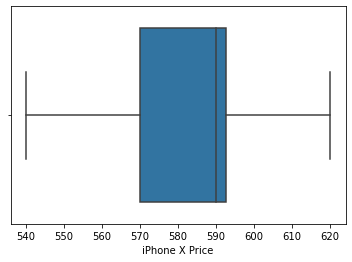

In [44]:
# Box-plot of sample data
sns.boxplot(df['iPhone X Price']);

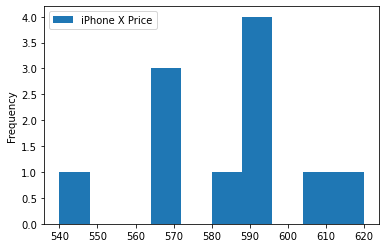

In [46]:
# Histogram of sample data
df.plot.hist();

    According to the boxplot, we see that the shape of the distribution may be slightly skewed to the left but not too far from symmetric. Please note that it is hard to tell much with only 11 observations. 

- The mean closing price for these 11 auctions was $584, close to the median of $590. - The lowest price was $540 and is not shown as an outlier on the box plot. 
- The z-score for this observation is -1.97, so it is within two standard deviations of the mean. 
- The assumptions for using the t distribution are that the data come from a random sample and that the distribution of the final auction price is approximately normal. - Although these 11 observations can be regarded as a random sample from the population of all possible closing prices for iPhones X posted for sale on eCommerce A in the given time period, checking that they roughly follow a normal model is more difficult. 
- With just 11 observations, box plots or histograms are not very informative about the true shape. However, the box plot doesn’t show an outlier, so we can proceed with the analysis as the assumptions are not violated.


**b.**

As mu denote the population mean for the closing price of the auction, thus we can use the the sample mean of 11 observations as the point estimate of mu.

x_bar = 583.64
s = 22.15
n = 11

se = s/sqrt(n)
   = 22.15/sqrt(n)
   = 6.68

Because n = 11, the degrees of freedom to use for the t-score are:<br>
df = n - 1<br>
df = 11 - 1<br>
df = 10

Now, we take a look the t-table. For a 95% confidence level, we use t.025 = 2.228.
Then, we can calculate the 95% confidence interval as follows:

ci = x_bar +- t.025(se)<br>
ci = 583.64 +- 2.228*6.68<br>
ci = 583.64 +- 14.88 or (568.8, 598.5)


    Conclusion

With 95% confidence, the range of price of the iPhone X posted for sale on eCommere A in new condition is between $569 and $599. We can conclude that even the upper bound is $50 below the retail price of $649.

Thus, we can save at least $50 when buying the phone from eCommerce A.

In [8]:
# SE

x_bar = 583.64
s = 22.15
n = 11

se_iphone = s/np.sqrt(n)
se_iphone

6.6784762823974635

### **3.**

Are automatic cars from Hyundai and Toyota having the same mean price? Prove it with the statistical test!

In [9]:
df_car = pd.read_csv('all_cars.csv').drop(columns='Unnamed: 0')
df_car.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


Firstly, we need to define the Ho and Ha.
- Ho: Hyundai = Toyota
- Ha: Hyundai != Toyota

In [10]:
# Create a subset DataFrame containing only Hyundai and Toyota
df_HT = df_car[(df_car['transmission']=='Automatic') & (df_car['brand'].isin(['Hyundai', 'Toyota']))]
df_HT

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10669,Hyundai,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
10675,Hyundai,Tucson,2016,14199,Automatic,30300,Diesel,125,57.6,1.7
10676,Hyundai,I30,2018,10399,Automatic,38082,Petrol,145,51.4,1.4
10697,Hyundai,Tucson,2016,15800,Automatic,20025,Diesel,125,57.6,1.7
10698,Hyundai,Ioniq,2018,15000,Automatic,32227,Hybrid,135,78.5,1.6
...,...,...,...,...,...,...,...,...,...,...
22250,Toyota,Camry,2019,25990,Automatic,10732,Hybrid,135,52.3,2.5
22253,Toyota,Verso-S,2012,5795,Automatic,61237,Petrol,30,54.3,1.3
22254,Toyota,IQ,2009,3995,Automatic,27292,Petrol,20,60.1,1.0
22259,Toyota,IQ,2011,5995,Automatic,29000,Petrol,20,58.9,1.0


In [11]:
# Check the median price of each brand
df_HT.groupby(['brand', 'transmission'], as_index=False).median()[['brand', 'transmission', 'price']]

,brand,transmission,price
0,Hyundai,Automatic,15998.0
1,Toyota,Automatic,14999.0


In [12]:
# Check the mean price of each brand
df_HT.groupby(['brand', 'transmission'], as_index=False).mean()[['brand', 'transmission', 'price']]

,brand,transmission,price
0,Hyundai,Automatic,16369.224215
1,Toyota,Automatic,16582.828754


In [13]:
# Normality test by using Shapiro Wilk method
from scipy.stats import shapiro

print('Hypothesis')
print('Ho: The sample data is normally distributed')
print('Ha: The sample data is not normally distributed')

stat, pval_shapiro1 = shapiro(df_HT['price'])

print(f'p-value = {pval_shapiro1:.5f}')

if pval_shapiro1 < 0.05:
    print (f'p-value <= 0.05, Reject Ho')
else :
    print (f'p-value >  0.05, Failed to reject Ho')

Hypothesis
Ho: The sample data is normally distributed
Ha: The sample data is not normally distributed
p-value = 0.00000
p-value <= 0.05, Reject Ho


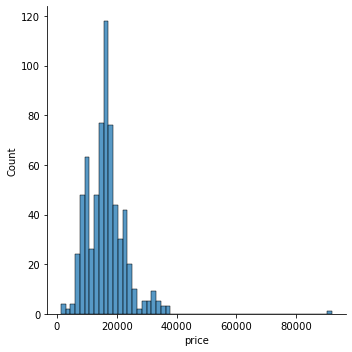

In [38]:
sns.displot(df_HT[df_HT['brand']=='Hyundai']['price']);

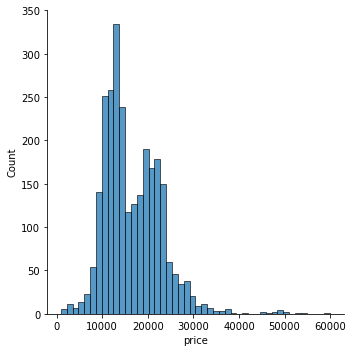

In [37]:
sns.displot(df_HT[df_HT['brand']=='Toyota']['price']);

Both of groups data do not follow the normal distribution pattern. Thus, the most proper way to do the hypothesis testing is using the non-parametric method. However, as we have not learned it yet, just assume that the data distribution follows the normal distribution.

In [16]:
# Variance of Hyundai automatic
df_HT[df_HT['brand']=='Hyundai']['price'].var()

44431372.32390376

In [17]:
# Variance of Toyota automatic
df_HT[df_HT['brand']=='Toyota']['price'].var()

40081611.93564868

In [18]:
# Statistical test with t-test independence for double population mean
from scipy.stats import ttest_ind

print('Hypothesis')
print('Ho: Mean price of automatic Hyundai = mean price of automatic Toyota')
print('Ha: Mean price of automatic Hyundai ≠ mean price of automatic Toyota')

stat, pval = ttest_ind(
    df_HT[df_HT['brand']=='Hyundai']['price'],
    df_HT[df_HT['brand']=='Toyota']['price'], 
    equal_var=False
)

print(f'p-value = {pval:.5f}')

if pval < 0.05:
    print (f'p-value <= 0.05, Reject Ho')
else :
    print (f'p-value > 0.05, Failed to reject Ho')

Hypothesis
Ho: Mean price of automatic Hyundai = mean price of automatic Toyota
Ha: Mean price of automatic Hyundai ≠ mean price of automatic Toyota
p-value = 0.45450
p-value > 0.05, Failed to reject Ho


    Conclusion
According to the statistical test, we failed to reject the null hypothesis as we have no enough evidence to reject it (p-value is larger than alpha). In other words, the mean price of Hyundai and Toyota automatic car is not significantly different.

### **4.**

Is the mean mileage of all brands produced in 2019 the same? Prove it with the statistical test!

In [19]:
# Create a new DataFrame consisting only cars produced in 2019
df_2019 = df_car[df_car['year'] == 2019]
df_2019

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
45,Audi,A3,2019,15700,Manual,2029,Petrol,145,49.6,1.0
74,Audi,A3,2019,16000,Manual,5704,Petrol,145,49.6,1.0
90,Audi,A3,2019,25499,Semi-Auto,4000,Petrol,145,44.1,1.5
91,Audi,Q2,2019,25499,Semi-Auto,7897,Diesel,145,47.9,2.0
...,...,...,...,...,...,...,...,...,...,...
22246,Toyota,Camry,2019,26491,Automatic,4416,Hybrid,135,52.3,2.5
22247,Toyota,Camry,2019,27550,Automatic,4189,Hybrid,135,52.3,2.5
22248,Toyota,Camry,2019,25490,Automatic,6340,Hybrid,135,52.3,2.5
22249,Toyota,Camry,2019,26990,Automatic,3000,Hybrid,135,52.3,2.5


In [20]:
# Mean of mileage of each brand
df_2019.groupby('brand').mean()[['mileage']]

,mileage
brand,
Audi,5491.362840
Hyundai,6326.506446
Toyota,5994.275272


In [21]:
# Median of mileage of each brand
df_2019.groupby('brand').median()[['mileage']]

,mileage
brand,
Audi,5000.0
Hyundai,4989.0
Toyota,5276.0


In [22]:
# Normality test by using Shapiro Wilk method
from scipy.stats import shapiro

print('Hypothesis')
print('Ho: The sample data is normally distributed')
print('Ha: The sample data is not normally distributed')

stat, pval_shapiro1 = shapiro(df_2019['mileage'])

print(f'p-value = {pval_shapiro1:.5f}')

if pval_shapiro1 < 0.05:
    print (f'p-value <= 0.05, Reject Ho, data is not normally distributed')
else :
    print (f'p-value >  0.05, Failed to reject Ho, data is normally distributed')

Hypothesis
Ho: The sample data is normally distributed
Ha: The sample data is not normally distributed
p-value = 0.00000
p-value <= 0.05, Reject Ho, data is not normally distributed


C:\Users\maulialwan\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


    The above result tells us that the normality test may not be accurate if the sample size is > 5000. If the sample size is greater than 5000, Ho is likely to fail to reject (following the central limit of theorem).

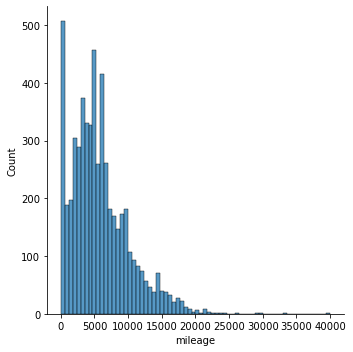

In [36]:
# Supporting the evidence with graphical plot
sns.displot(df_2019['mileage']);

In [24]:
df_2019['brand'].value_counts()

Audi       3197
Toyota     1286
Hyundai    1086
Name: brand, dtype: int64

In [25]:
# Statistical test of Anova one-way
from scipy.stats import f_oneway

# Hypothesis
print('Hypothesis')
print('Ho: The mean mileage of all brands are the same.')
print('Ha: At least two groups are different from each other.')

# Anova one-way
stat, pval = f_oneway(
    df_2019[df_2019['brand']=='Audi']['mileage'],
    df_2019[df_2019['brand']=='Hyundai']['mileage'],
    df_2019[df_2019['brand']=='Toyota']['mileage'] 
)

# p-value
print(f'p-value = {pval:.5f}')

if pval < 0.05:
    print (f'p-value <= 0.05, Reject Ho')
else:
    print (f'p-value >  0.05, Failed to reject Ho')

Hypothesis
Ho: The mean mileage of all brands are the same.
Ha: At least two groups are different from each other.
p-value = 0.00000
p-value <= 0.05, Reject Ho


    Conclusion

Using Anova one-way test, we can infer that at least two groups have different mean mileage from each other, but we do not know which one. 

    Use the 'mpg' dataset from seaborn for following question.

### **5.**

Are the mean weight of cars from the USA, Europe, and Japan the same? Prove it with the proper statistical method!

In [30]:
df_mpg = sns.load_dataset('mpg')
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [33]:
# Mean of weight of each brand
df_mpg.groupby('origin').mean()[['weight']]

,weight
origin,
europe,2423.300000
japan,2221.227848
usa,3361.931727


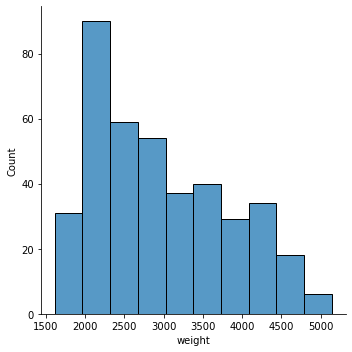

In [47]:
# Distribution plot of weight
sns.displot(df_mpg['weight']);

In [34]:
# Normality test by using Shapiro Wilk method
from scipy.stats import shapiro

print('Hypothesis')
print('Ho: The sample data is normally distributed')
print('Ha: The sample data is not normally distributed')

stat, pval_shapiro1 = shapiro(df_mpg['weight'])

print(f'p-value = {pval_shapiro1:.5f}')

if pval_shapiro1 < 0.05:
    print (f'p-value <= 0.05, Reject Ho, data is not normally distributed')
else :
    print (f'p-value >  0.05, Failed to reject Ho, data is normally distributed')

Hypothesis
Ho: The sample data is normally distributed
Ha: The sample data is not normally distributed
p-value = 0.00000
p-value <= 0.05, Reject Ho, data is not normally distributed


In [35]:
# Statistical test of Anova one-way
from scipy.stats import f_oneway

# Hypothesis
print('Hypothesis')
print('Ho: The mean weight of all brands are the same.')
print('Ha: At least two groups are different from each other.')

# Anova one-way
stat, pval = f_oneway(
    df_mpg[df_mpg['origin']=='usa']['weight'],
    df_mpg[df_mpg['origin']=='europe']['weight'],
    df_mpg[df_mpg['origin']=='japan']['weight'] 
)

# p-value
print(f'p-value = {pval:.5f}')

if pval < 0.05:
    print (f'p-value <= 0.05, Reject Ho')
else:
    print (f'p-value > 0.05, Failed to reject Ho')

Hypothesis
Ho: The mean weight of all brands are the same.
Ha: At least two groups are different from each other.
p-value = 0.00000
p-value <= 0.05, Reject Ho


    Conclusion

Using Anova one-way test, as p-value is less than alpha, we can infer that at least two groups have different mean weight from each other, but we do not know which one.